# PASSO 01 - TRATAMENTO DA BASE DE ACORDO COM O ROTEIRO

## 1.1 imports:

In [1]:
# imports:

#!pip install seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importando dataset:

df = pd.read_csv('cs_bisnode_panel.csv')

## 1.2. Tratamentos iniciais

In [3]:
df1 = df.copy()

# removendo colunas 'COGS', 'finished_prod', 'net_dom_sales', 'net_exp_sales', 'wages', 'D':
df1 = df1.drop(['COGS', 'finished_prod', 'net_dom_sales', 'net_exp_sales', 'wages', 'D'], axis=1)

# removendo dados do ano de 2016 da coluna year:
df1 = df1[df1['year']!=2016]



In [51]:
# Criando variável dependente 'closed' que indica se a empresa deixou de operar:

## Ordenar por 'comp_id' e 'year'
df1 = df1.sort_values(['comp_id', 'year'])

## Criar uma coluna 'will_close' que indica se a empresa deixará de operar a partir do próximo ano
df1['will_close'] = (
        (df1.groupby('comp_id')['sales'].shift(-1) == 0) &
        (df1.groupby('comp_id')['sales'].shift(-2) == 0)
    ).astype(int)

#df1[['comp_id', 'year','sales', 'will_close']].head(11).sort_values('comp_id')

# filtrando apenas empresas do ano de 2012:
df1 = df1[df1['year']==2012]

# tratando valores negativos da coluna sales utilizando np.where para trocar valores negativos por 0:
df1['sales'] = np.where(df1['sales']<0, 0, df1['sales'])

# criando coluna em log da variável sales:
df1['log_sales'] = np.log(df1['sales'])

# criando coluna company_age subtraindo founded_year e year:
df1['company_age'] = df1['year'] - df1['founded_year']

# filtrando empresas que possuem revenue abaixo de 10.000.000 e acima de 1.000 euros:
df1 = df1[(df1['sales'] > 1000) & (df1['sales'] < 10000000)]



# PASSO 02 - DESCRICAO DOS DADOS

## 2.1. Dimensão dos dados

In [50]:
print( 'Numero de Linhas: {}'.format( df1.shape[0] ) )
print( 'Número de Colunas: {}'.format( df1.shape[1] ) )

Numero de Linhas: 21717
Número de Colunas: 45


## 2.2. Tipo dos dados


In [7]:
df1.dtypes

comp_id                 float64
begin                    object
end                      object
amort                   float64
curr_assets             float64
curr_liab               float64
extra_exp               float64
extra_inc               float64
extra_profit_loss       float64
fixed_assets            float64
inc_bef_tax             float64
intang_assets           float64
inventories             float64
liq_assets              float64
material_exp            float64
personnel_exp           float64
profit_loss_year        float64
sales                   float64
share_eq                float64
subscribed_cap          float64
tang_assets             float64
balsheet_flag             int64
balsheet_length           int64
balsheet_notfullyear      int64
year                      int64
founded_year            float64
exit_year               float64
ceo_count               float64
foreign                 float64
female                  float64
birth_year              float64
inoffice

## 2.3. Mudando Tipo dos Dados

In [8]:
# transformando colunas de data no formato datetime:

colunas_de_data = ['begin', 'end', 'founded_date', 'exit_date']

df1[colunas_de_data] = df1[colunas_de_data].apply(pd.to_datetime, format='%Y-%m-%d', errors='coerce')

# transformando coluna int32 em int64:
df1['will_close'] = df1['will_close'].astype('int64')

## 2.4. Checando NA

<Axes: >

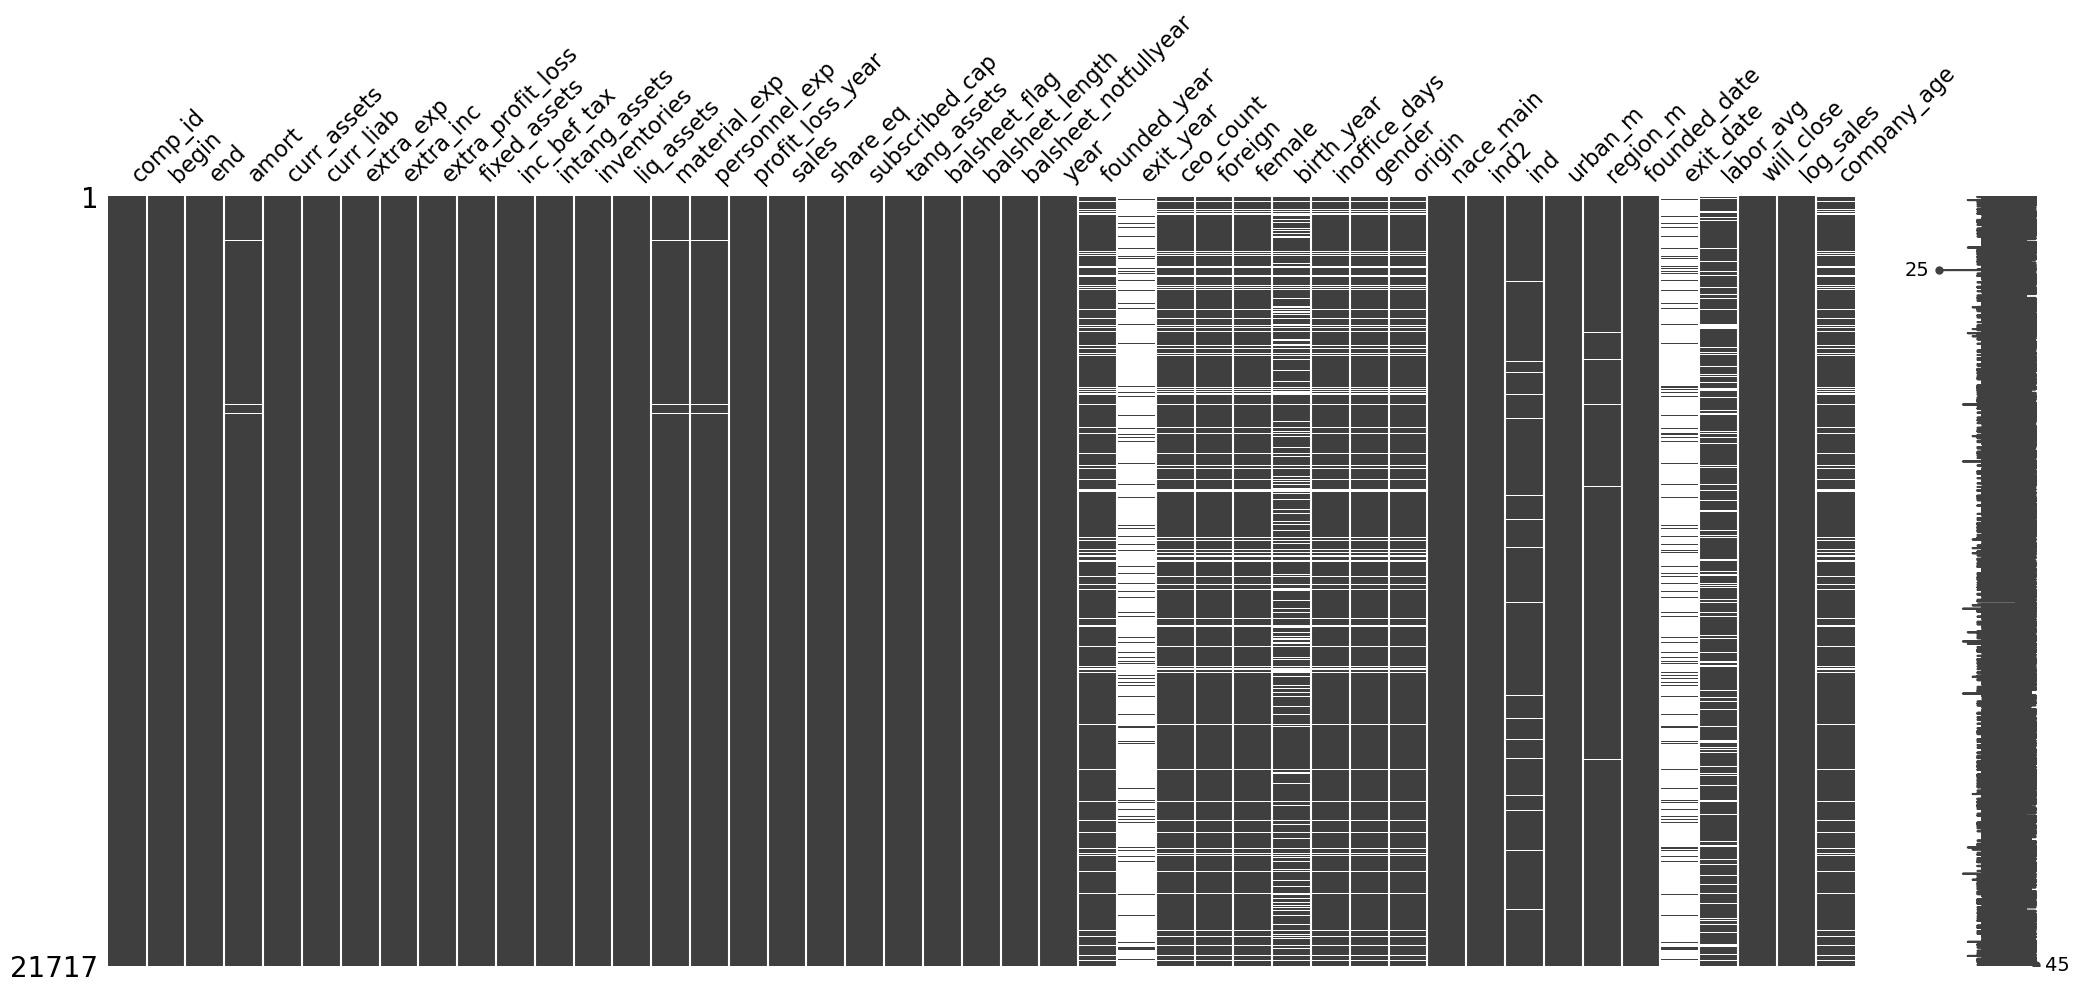

In [9]:
import missingno as msno

msno.matrix(df1)

## 2.5. Preenchendo NA

In [52]:
# Definir com grupo como serão tratados os NA's

## 2.6. Análise Descritiva

In [28]:
var_num = df1.select_dtypes( include=['int64', 'float64'] )
var_cat = df1.select_dtypes( exclude=['int64', 'float64','datetime64[ns]'] )

var_num.columns

Index(['comp_id', 'amort', 'curr_assets', 'curr_liab', 'extra_exp',
       'extra_inc', 'extra_profit_loss', 'fixed_assets', 'inc_bef_tax',
       'intang_assets', 'inventories', 'liq_assets', 'material_exp',
       'personnel_exp', 'profit_loss_year', 'sales', 'share_eq',
       'subscribed_cap', 'tang_assets', 'balsheet_flag', 'balsheet_length',
       'balsheet_notfullyear', 'year', 'founded_year', 'exit_year',
       'ceo_count', 'foreign', 'female', 'birth_year', 'inoffice_days',
       'nace_main', 'ind2', 'ind', 'urban_m', 'labor_avg', 'will_close',
       'log_sales', 'company_age'],
      dtype='object')

### 2.6.1. Atributos Numéricos

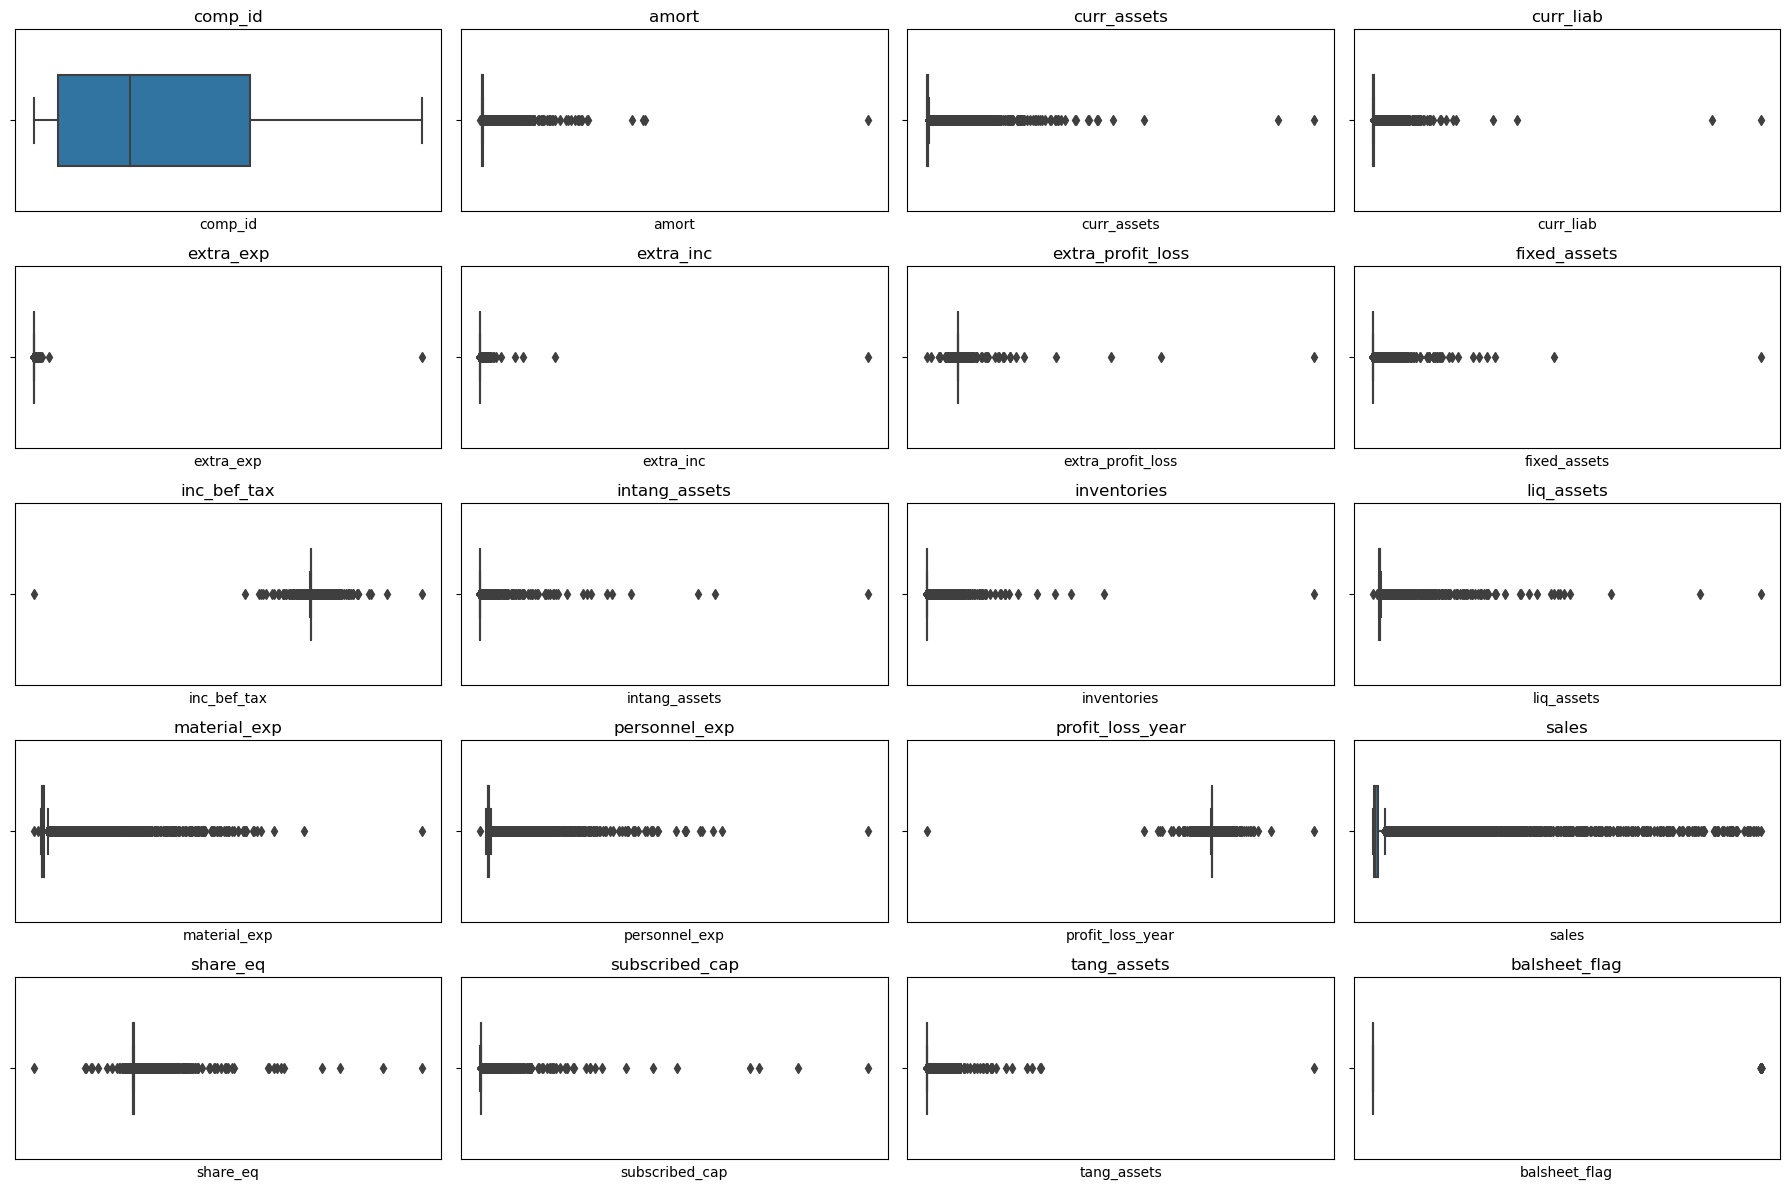

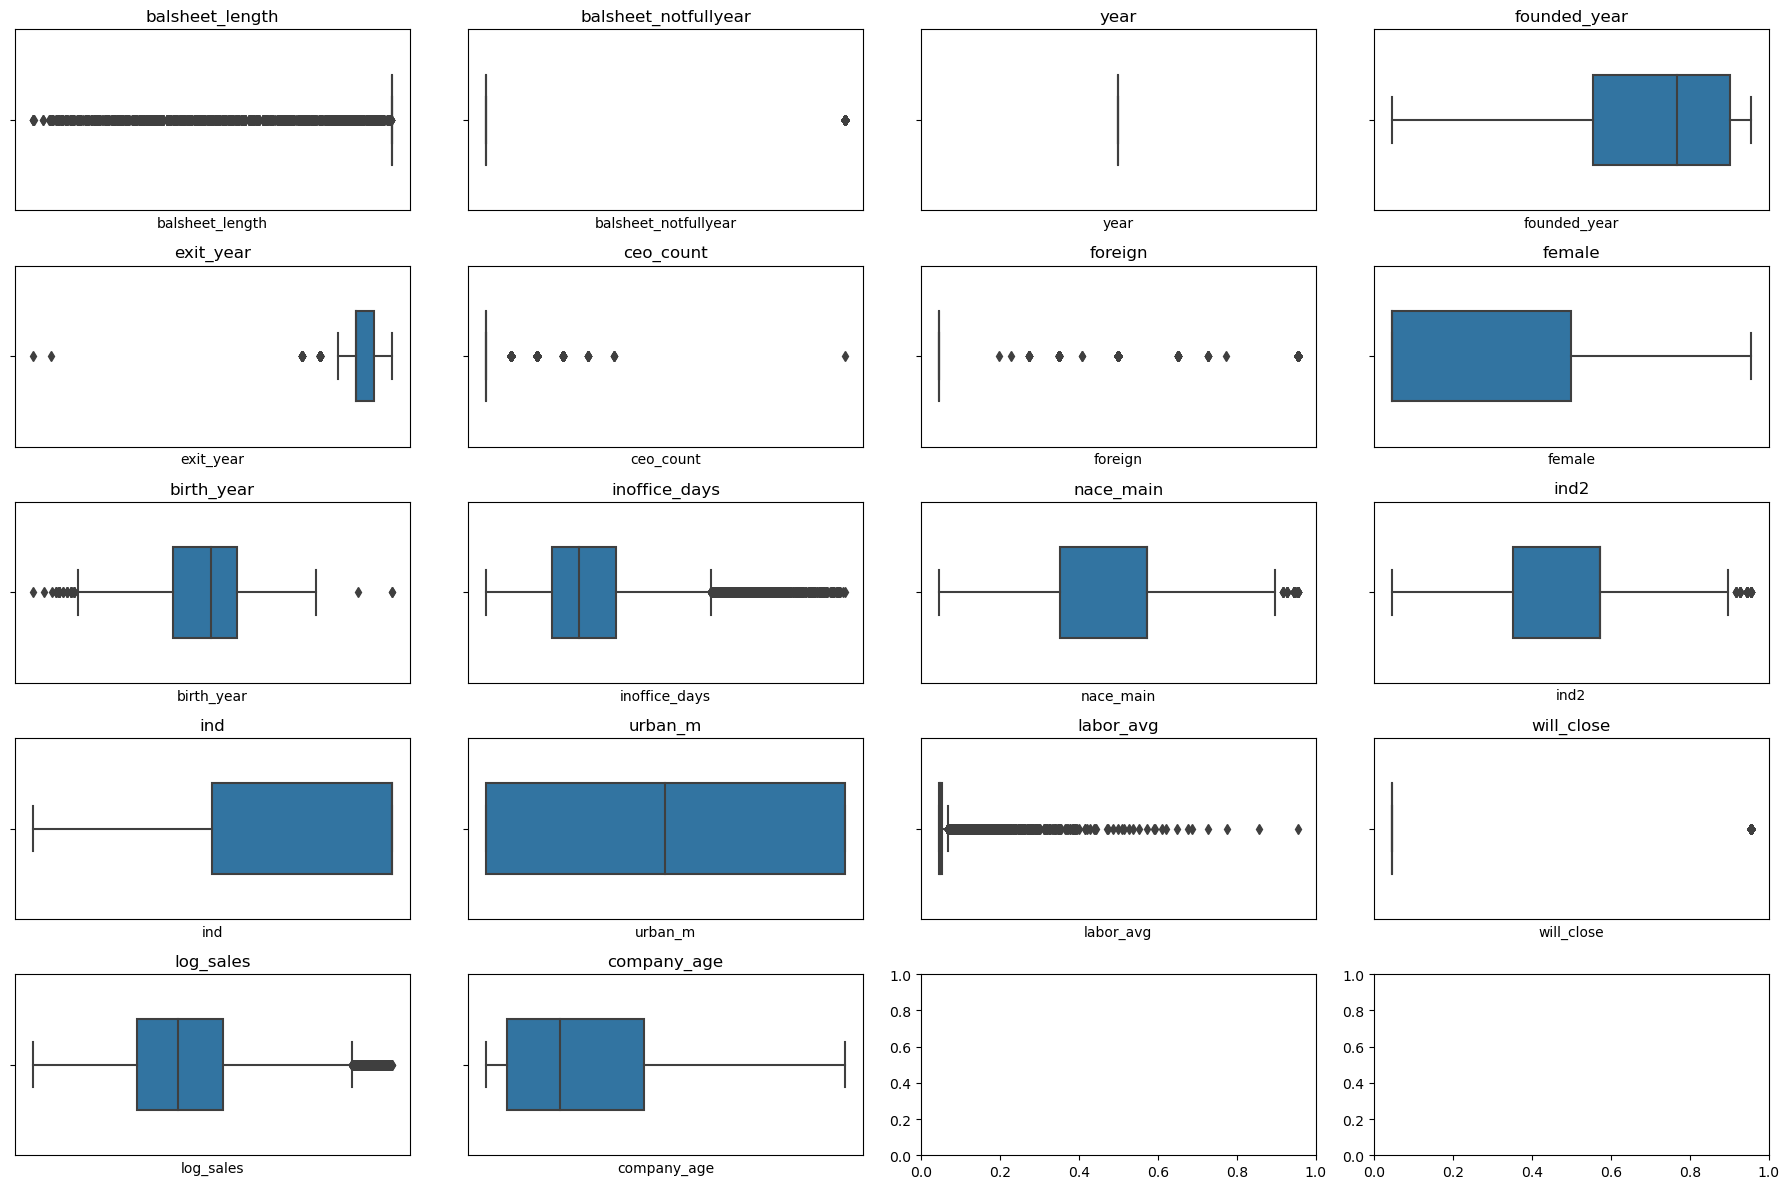

In [39]:
# fazendo boxplot de todas as variáveis numéricas para identificar as distribuições:

colunas = var_num.columns

# Configurações para a disposição dos subplots
num_linhas = 5  
num_colunas = 4  

# Calcula o número total de figuras necessárias
num_total_figuras = (len(colunas) // (num_linhas * num_colunas)) + 1

# Tamanho da figura
tamanho_figura = (18, 12)

# Loop para criar cada figura com os boxplots
for figura_num in range(num_total_figuras):
    fig, axs = plt.subplots(num_linhas, num_colunas, figsize=tamanho_figura)
    
    # Colunas para esta figura
    inicio_coluna = figura_num * num_linhas * num_colunas
    fim_coluna = (figura_num + 1) * num_linhas * num_colunas
    colunas_figura = colunas[inicio_coluna:fim_coluna]

    # Iterar pelas colunas e criar os boxplots para esta figura
    for i, coluna in enumerate(colunas_figura):
        linha = i // num_colunas
        col = i % num_colunas
        sns.boxplot(x=var_num[coluna], ax=axs[linha, col], width=0.5)
        axs[linha, col].set_title(coluna)
        axs[linha, col].set_xticks([])  # Remove os rótulos do eixo x

    # Ajustar o layout
    plt.tight_layout()

    # Exibir a figura
    plt.show()

### 2.6.2. Atributos Categóricos

# PASSO 03 - FEATURE ENGINEERING

## 3.1. Mapa Mental de Hipoteses

## 3.2. Criacao das Hipoteses

## 3.2.2. Hipoteses Produto

## 3.2.3. Hipoteses Tempo



## 3.4. Feature Engineering

# PASSO 04 - FILTRAGEM DE VARIÁVEIS

## 4.1. Filtragem das Linhas

## 4.2. Selecao das Colunas

# PASSO 05 - ANALISE EXPLORATORIA DOS DADOS

## 5.1. Analise Univariada

### 5.1.1. Variável Resposta

### 5.1.2. Variável Numérica

### 5.1.3. Variável Categórica

## 5.2. Analise Bivariada

# PASSO 06 - DATA PREPARATION

## 6.1. Normalizacao

# PASSO 07 - SELEÇÃO DE VARIÁVEIS

## 7.1. Split do Dataframe entre Treino e Teste

# PASSO 08 - MODELAGEM DE MACHINE LEARNING


## 8.1. Modelo nulo - Média

## 8.2. Modelo de Regressão Linear

## 8.3. Modelo de Regressão Linear Regularizada - LASSO

## 8.4. Floresta Aleatória

## 8.5. Comparando performance